# Problem 1

In [1]:
import numpy as np
from numpy import linalg as lg
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

In [3]:
b = np.array([4.5, 6])
norm_b = lg.norm(b)
def f(x): return lg.norm(x - b)
def Df(x): return (x - b) / f(x)
x = np.array([0, 0])

In [4]:
# 2)
x = x - Df(x)

After 7 steps with constant step size 1, x reaches $\binom{4.2}{5.6}$. 
Since $\nabla f(x) = \frac{x - b}{\| x - b \|}$, $x^k - \nabla f(x^k)$ always takes steps of size 1 directly towards b. 
$\| x^7 - b \| = 0.5 < 1$, so the sequence cannot converge.

In [5]:
# 3)
k = 0
x = x - Df(x) * (5/6)**k

$\| x^0 - b \| = 7.5 > 6 = \frac{1}{1 - 5/6} = \sum_{k = 0}^{\infty} (\frac{5}{6})^k$. 
Therefore, it is impossible for the sequence to converge, the steps reduce in size too quickly. 

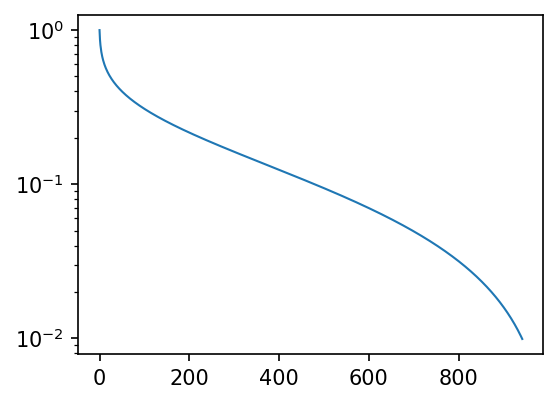

In [6]:
# 4)
error = [1.0]
x, k = np.array([0, 0]), 0
while error[-1] > 0.01:
    x = x - Df(x) / (k+1)
    error.append(f(x) / norm_b)
    k = k + 1

plt.semilogy(np.arange(error.__len__()), error)

&nbsp;

&nbsp;

&nbsp;

In [7]:
def g(x): return ((x - b)**2).sum()
def Dg(x): return 2 * (x - b)

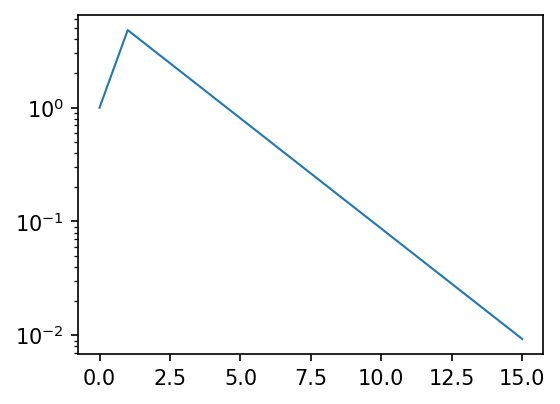

In [8]:
# 5)
error = [1.0]
x, k = np.array([0, 0]), 0
while error[-1] > 0.01:
    x = x - Dg(x) * 0.1
    error.append(g(x) / norm_b)
    k = k + 1
plt.semilogy(np.arange(error.__len__()), error)

In [9]:
# 6)
x, k, z = np.array([0, 0]), 0, 1.0
while z > np.finfo(float).eps:
    z = z * (1/6)
    x = x - Dg(x) * z
    k = k + 1

After 20 steps, the step length has reached the machine epsilon. Unfortunately, $x^k - (\frac{1}{6})^k \nabla g(x)$ does not reach 1% of the optimal solution in 20 steps. Therefore, the sequence will not converge. 

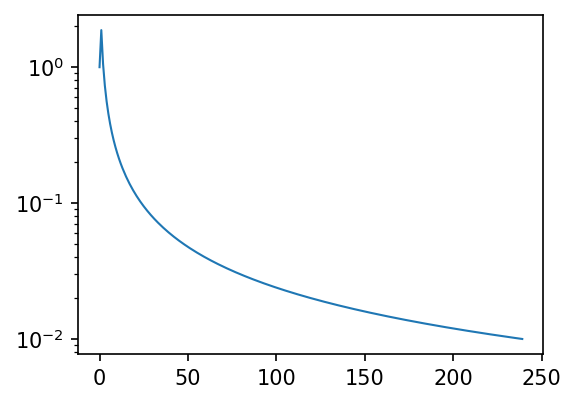

In [10]:
# 7)
error = [1.0]
x, k = np.array([0, 0]), 0
while error[-1] > 0.01:
    x = x - Dg(x) / (4*k + 4)
    error.append(g(x) / norm_b)
    k = k + 1
plt.semilogy(np.arange(error.__len__()), error)